[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/16g2ff_jqMcbGsWl4uQ5vvJPfhXV9zWbE?usp=sharing)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

In [2]:
def circle(r, h, k):
  """
  Returns x coordinates and y coordinates of a circle
  params:
    r = length of radius
    h = translation in x axis
    k = translation in y axis
  """
  start = np.min([r+h, -r+h])
  stop = np.max([r+h, -r+h])
  x = np.linspace(start, stop, 50)
  top = np.sqrt(r**2 - (x-h)**2) + k
  bottom = -np.sqrt(r**2 - (x-h)**2) + k
  circle_coors = np.array([np.concatenate([x,x]), np.concatenate([top,bottom])])
  return circle_coors

In [3]:
contour_coords = circle(6, 0, 0)
r_eyebrow_coords = circle(1, -3, 3)
l_eyebrow_coords = circle(1, 3, 3)
r_eye_coords = circle(.5, -3, 1)
l_eye_coords = circle(.5, 3, 1)
smile_coords = circle(1.25, 0, -3.25)
# Only keep top part of circle:
r_eyebrow_coords = r_eyebrow_coords[:,:50]
l_eyebrow_coords = l_eyebrow_coords[:,:50]
# Only keep bottom part of circle:
smile_coords = smile_coords[:,50:]

face_coords_list = [
                    contour_coords, 
                    r_eyebrow_coords, 
                    l_eyebrow_coords,
                    r_eye_coords,
                    l_eye_coords,
                    smile_coords,
                    ]

In [4]:
def plt_coords_list(coors_list):
  for coords in coors_list:
    plt.scatter(coords[0,:], coords[1,:], s = 5)

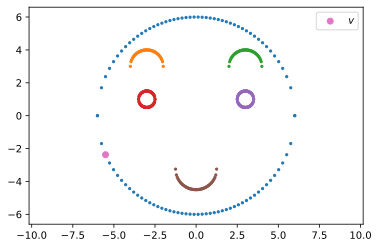

In [5]:
plt_coords_list(face_coords_list)
plt.scatter(-5.510,-2.374, label = '$v$')
plt.legend()
plt.axis('equal');

Our smiley face is just a sample of vectors living in $\mathbb{R}^2$.

Any vector part of our smiley face can be represented as a linear combination of basis vectors.

Let $\{\hat{\textbf{i}}, \hat{\textbf{j}}\}$ be the standard basis of $\mathbb{R}^2$. Therefore: $ \hat{\textbf{i}} = \begin{bmatrix} 1\\0 \end{bmatrix}$ and $ \hat{\textbf{j}} = \begin{bmatrix} 0\\1 \end{bmatrix}$ 

For example the vector $ \textbf{v} = \begin{bmatrix} -5.510\\-2.374 \end{bmatrix}$ is just a linear combination of $\hat{\textbf{i}}$ and $\hat{\textbf{j}}$

$$\textbf{v} = c_1\hat{\textbf{i}} + c_2\hat{\textbf{j}}$$

$$\textbf{v} = -5.510\hat{\textbf{i}} + -2.374\hat{\textbf{j}}$$

$$\textbf{v} = -5.510\begin{bmatrix} 1\\0 \end{bmatrix} + -2.374\begin{bmatrix} 0\\1 \end{bmatrix} $$

$$\textbf{v} = \begin{bmatrix} (-5.510)(1)\\(-5.510)(0) \end{bmatrix} + \begin{bmatrix} (-2.374)(0)\\(-2.374)(1) \end{bmatrix} $$

$$\textbf{v} = \begin{bmatrix} -5.510\\0 \end{bmatrix} + \begin{bmatrix} 0\\-2.374 \end{bmatrix} $$

$$\textbf{v} = \begin{bmatrix} -5.510\\-2.374 \end{bmatrix} $$



## Functions between vector spaces: 

Let $L$ be a function between two vector spaces $V_1$ and $V_2$.
$$L: V_1 \mapsto V_2$$

This means that if $\textbf{v} \in V_1$ then $L(\textbf{v}) \in V_2$.

Note: functions between vector spaces are also called linear transformations or linear maps.

In $\mathbb{R}^n$ linear maps are represented as matrix multiplication. For example:

Let's have $\textbf{v} \in \mathbb{R}^2$ and $L:\mathbb{R}^2 \mapsto \mathbb{R}^2$ be defined by $L(\textbf{v}) = \textbf{A}\textbf{v}$

For example if $\textbf{A} = \begin{bmatrix}
2 & 0 \\
0 & 2
\end{bmatrix}$ and $\textbf{v} = \begin{bmatrix} 2\\3 \end{bmatrix}$

Then:
$$L(\textbf{v}) = \textbf{A}\textbf{v} = 
\begin{bmatrix} 2 & 0 \\ 0 & 2\end{bmatrix}
\begin{bmatrix} 2\\3 \end{bmatrix} = 
\begin{bmatrix} (2)(2)+(0)(3)  \\ (0)(2)+(2)(3) \end{bmatrix} =
\begin{bmatrix} 4  \\ 6 \end{bmatrix} 
$$

Now let's see what type of transformations we can perform on our smiley face by using different matrices:

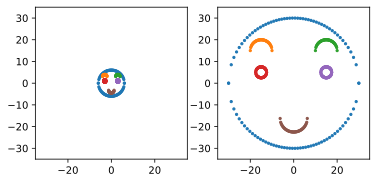

In [6]:
A = np.array(
    [[5,0],
    [0,5],]
)

transformed_coords_list = [np.dot(A, coords) for coords in face_coords_list]

plt.subplot(1,2,2)
plt_coords_list(transformed_coords_list)
plt.xlim((-35,35))
plt.ylim((-35,35))
plt.gca().set_aspect('equal', adjustable='box')
plt.subplot(1,2,1)
plt_coords_list(face_coords_list)
plt.xlim((-35,35))
plt.ylim((-35,35))
plt.gca().set_aspect('equal', adjustable='box')

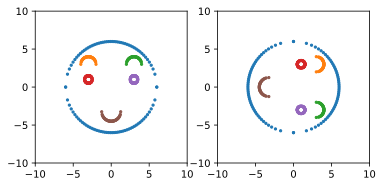

In [7]:
A = np.array(
    [[0,1],
    [-1,0],]
)

transformed_coords_list = [np.dot(A, coords) for coords in face_coords_list]

plt.subplot(1,2,2)
plt_coords_list(transformed_coords_list)
plt.xlim((-10,10))
plt.ylim((-10,10))
plt.gca().set_aspect('equal', adjustable='box')
plt.subplot(1,2,1)
plt_coords_list(face_coords_list)
plt.xlim((-10,10))
plt.ylim((-10,10))
plt.gca().set_aspect('equal', adjustable='box')

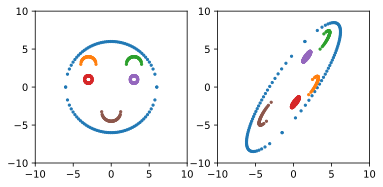

In [8]:
A = np.array(
    [[.25,1],
    [1,1],]
)

transformed_coords_list = [np.dot(A, coords) for coords in face_coords_list]

plt.subplot(1,2,2)
plt_coords_list(transformed_coords_list)
plt.xlim((-10,10))
plt.ylim((-10,10))
plt.gca().set_aspect('equal', adjustable='box')
plt.subplot(1,2,1)
plt_coords_list(face_coords_list)
plt.xlim((-10,10))
plt.ylim((-10,10))
plt.gca().set_aspect('equal', adjustable='box')

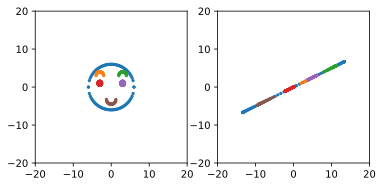

In [9]:
A = np.array(
    [[1,2],
    [.5,1],]
)

transformed_coords_list = [np.dot(A, coords) for coords in face_coords_list]

plt.subplot(1,2,2)
plt_coords_list(transformed_coords_list)
plt.xlim((-20,20))
plt.ylim((-20,20))
plt.gca().set_aspect('equal', adjustable='box')
plt.subplot(1,2,1)
plt_coords_list(face_coords_list)
plt.xlim((-20,20))
plt.ylim((-20,20))
plt.gca().set_aspect('equal', adjustable='box')

## Determinants:

What does the determinant of matrix tell us about the transformation produced by the matrix?

Let's check our examples:

In [10]:
# scaling transformation
A = np.array(
    [[5,0],
    [0,5],]
)

print(np.linalg.det(A))

24.999999999999996


In [11]:
# rotation transformation
A = np.array(
    [[0,1],
    [-1,0],]
)

print(np.linalg.det(A))

1.0


In [12]:
# shear and flipping transformation

A = np.array(
    [[.25,1],
    [1,1],]
)

print(np.linalg.det(A))

-0.75


In [13]:
# collapsing into smaller dimensional space transformation

A = np.array(
    [[1,2],
    [.5,1],]
)
print(np.linalg.det(A))

0.0


**Intuition:** the determinant quantifies how much the 'volume' of our original space changed after being transformed. 

When we scaled our original space by a factor of $5$, $\det(\textbf{A}) = 25$. This makes sense since scaling each dimension of a square living in $\mathbb{R}^2$ by $5$, will increase the area of that square by a factor of $5^2$.

When we rotated our original space, $\det(\textbf{A}) = 1$. After rotation, the area occupied by any square does not change.

When we did the shearing and flipping, the shearing squished our space a little bit, making the absolute value of the determinant $< 1$. A determinant with a negative value means we 'flipped' the space. Therefore in this case $\det(\textbf{A}) = - 0.75$

## Inverse of a linear map

After applying a linear transformation in many cases, we can undo this transformation by using an inverse transformation. Formally this means:

Let $L: V_1 \mapsto V_2$. Then $L$ has an inverse if we can find another function $L^{-1}: V_2 \mapsto V_1$ such that:

For all $\textbf{v} \in V_1$: 

$$L^{-1}(L(\textbf{v})) = \textbf{v}$$

Let's do an example with our smiley face:


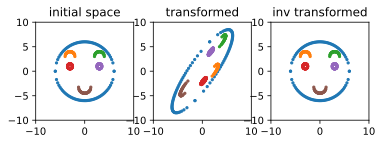

In [14]:
A = np.array(
    [[.25,1],
    [1,1],]
)

transformed_coords_list = [np.dot(A, coords) for coords in face_coords_list]

# Let's find the inverse of A
A_inv = np.linalg.inv(A)

# Apply inverse matrix to transformed space
inv_transformed_coords_list = [np.dot(A_inv, coords) for coords in transformed_coords_list]

plt.subplot(1,3,2)
plt_coords_list(transformed_coords_list)
plt.xlim((-10,10))
plt.ylim((-10,10))
plt.gca().set_aspect('equal', adjustable='box')
plt.title('transformed')
plt.subplot(1,3,1)
plt_coords_list(face_coords_list)
plt.xlim((-10,10))
plt.ylim((-10,10))
plt.gca().set_aspect('equal', adjustable='box')
plt.title('initial space')
plt.subplot(1,3,3)
plt_coords_list(inv_transformed_coords_list)
plt.xlim((-10,10))
plt.ylim((-10,10))
plt.gca().set_aspect('equal', adjustable='box')
plt.title('inv transformed');

How does inverse transformations relate to the determinant?

If the determinant is 0, this means that the original spaces collapsed into a space with smaller dimensionality. Many vectors in the original space get mapped to a single point in the transformed space. This process cannot be undone. **The transformation does not have an inverse**.

In [15]:
# collapsing into smaller dimensional space transformation
A = np.array(
    [[1,2],
    [.5,1],]
)

np.linalg.inv(A)

LinAlgError: ignored

## Solving linear equations:

Linear equations in the context of linear algebra take the form of:

$$\textbf{A}\textbf{x} = \textbf{b}$$

In this context will be given $\textbf{A}$ and $\textbf{b}$, so we need to solve for $\textbf{x}$.

$$\textbf{A}\textbf{x} = \textbf{b}$$
$$\textbf{A}^{-1}\textbf{A}\textbf{x} = \textbf{A}^{-1}\textbf{b}$$

By definition of inverse function:

$$\textbf{x} = \textbf{A}^{-1}\textbf{b}$$

Let's look at a concrete example:

Let's start by trying to solve a system of two linear equations:

$$2x - y = 0$$
$$-x + 2y = 3$$

We can write the same equations in matrix form:

$$\begin{bmatrix} 2 & -1 \\ -1 & 2\end{bmatrix}
\begin{bmatrix} x\\y \end{bmatrix} = \begin{bmatrix} 0\\3 \end{bmatrix} $$
$$\textbf{A}\textbf{x} = \textbf{b}$$

Where:

$\textbf{A}= \begin{bmatrix} 2 & -1 \\ -1 & 2\end{bmatrix}$, $\textbf{x} = \begin{bmatrix} x\\y \end{bmatrix} $, and $\textbf{b} = \begin{bmatrix} 0\\3 \end{bmatrix} $

Since we are solving for $\textbf{x}$:


$$\textbf{A}^{-1}\textbf{A}\textbf{x} = \textbf{A}^{-1}\textbf{b}$$
$$\textbf{x} = \textbf{A}^{-1}\textbf{b}$$

This problem reduces to finding the inverse of $\textbf{A}$, and multiplying $\textbf{b}$ by $\textbf{A}$ (on the left since matrix multiplication is not commutative).


In [16]:
A = np.array(
    [
     [2,-1],
     [-1,2]
    ] 
)

b = np.array(
    [
     [0],
     [3],
    ]  
)

A_inv = np.linalg.inv(A)

x = np.dot(A_inv , b)
print(x)

[[1.]
 [2.]]


$$\textbf{x} = \textbf{A}^{-1}\textbf{b} = \begin{bmatrix} 1\\2 \end{bmatrix}$$ 